In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv('spotify_history.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [4]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:
df.shape

(149860, 11)

In [6]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [7]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [8]:
print(df.columns.tolist())


['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped']


In [9]:
#finding 10 least popular songs in the spotify dataset
a = df.sort_values('artist_name',ascending=True)[0:10]
a[['album_name',  'artist_name']]


,album_name,artist_name
53812,Alpocalypse,"""Weird Al"" Yankovic"
148304,Poodle Hat,"""Weird Al"" Yankovic"
4434,Driving,& Friends
149327,Home For Christmas,*NSYNC
94931,No Strings Attached,*NSYNC
105633,Coastal Walks,.Sinh
108004,Guilty Conscience,070 Shake
108360,Guilty Conscience,070 Shake
115765,"Campfire Songs: The Popular, Obscure and Unkno...","10,000 Maniacs"
11627,R&B Hits,112


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ms_played,149860.0,128316.635093,117840.060331,0.0,2795.0,138840.0,218507.0,1561125.0


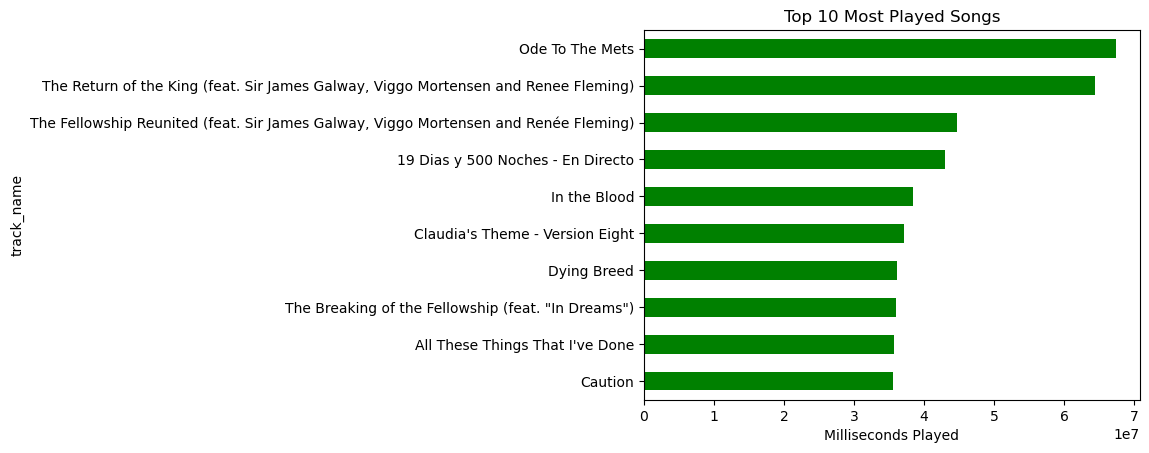

In [11]:
#  Top 10 Most Played Songs
top_songs = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_songs.plot(kind='barh', color='green')
plt.title("Top 10 Most Played Songs")
plt.xlabel("Milliseconds Played")
plt.gca().invert_yaxis()
plt.show()


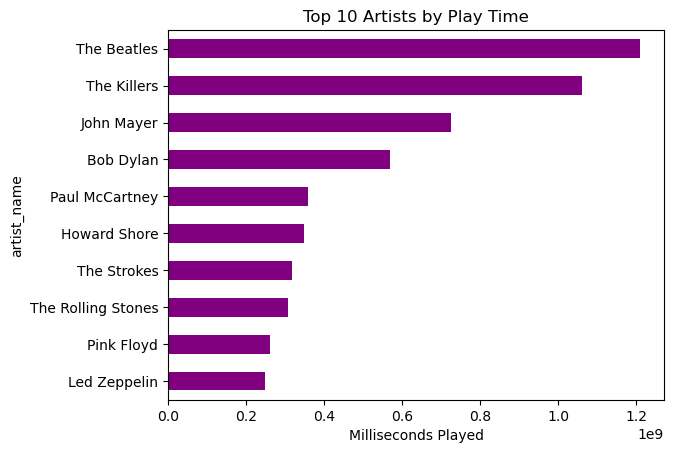

In [12]:
# Top 10 Artists by Play Time
top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists.plot(kind='barh', color='purple')
plt.title("Top 10 Artists by Play Time")
plt.xlabel("Milliseconds Played")
plt.gca().invert_yaxis()
plt.show()


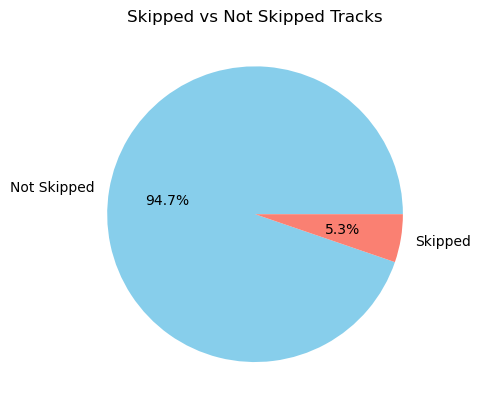

In [13]:
#  Skipping Analysis
skip_count = df['skipped'].value_counts()
skip_count.plot(kind='pie', autopct='%1.1f%%', labels=['Not Skipped', 'Skipped'], colors=['skyblue', 'salmon'])
plt.title("Skipped vs Not Skipped Tracks")
plt.ylabel("")
plt.show()


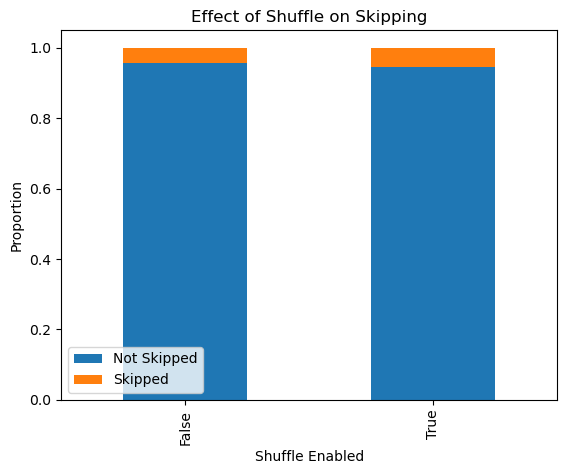

In [14]:
# Shuffle Impact on Skipping
shuffle_skipped = pd.crosstab(df['shuffle'], df['skipped'], normalize='index')
shuffle_skipped.plot(kind='bar', stacked=True)
plt.title("Effect of Shuffle on Skipping")
plt.xlabel("Shuffle Enabled")
plt.ylabel("Proportion")
plt.legend(["Not Skipped", "Skipped"])
plt.show()


In [15]:
print(df.columns.tolist())


['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped']


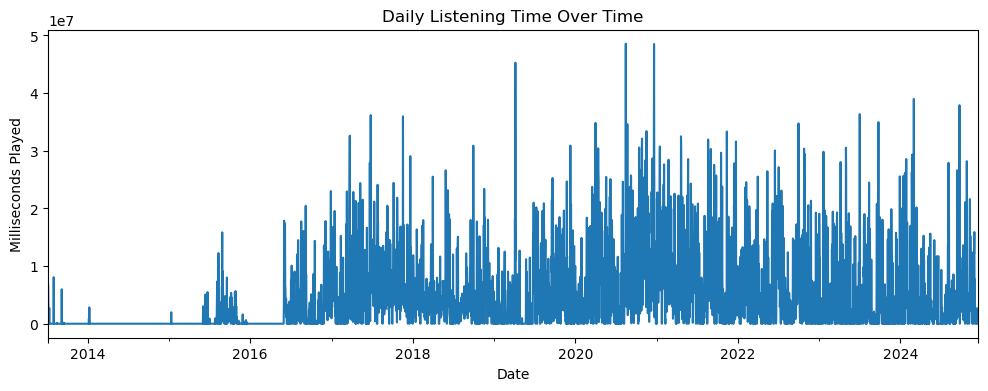

In [18]:
# Convert 'ts' to datetime format (if not already done)
df['ts'] = pd.to_datetime(df['ts'])

#  Set it as the index
df = df.set_index('ts')

#  Now  resample
df.resample('D')['ms_played'].sum().plot(figsize=(12, 4))
plt.title("Daily Listening Time Over Time")
plt.xlabel("Date")
plt.ylabel("Milliseconds Played")
plt.show()


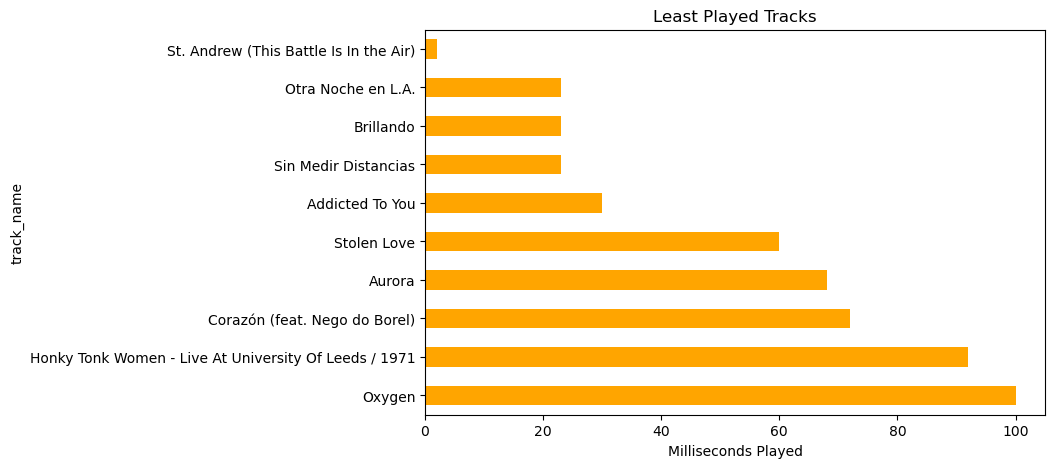

In [25]:
#Least Played Tracks
least_played = df.groupby('track_name')['ms_played'].sum()
least_played = least_played[least_played > 0].sort_values().head(10)

least_played.plot(kind='barh', title='Least Played Tracks', color='orange', figsize=(8,5))
plt.xlabel('Milliseconds Played')
plt.gca().invert_yaxis()
plt.show()
